# __Apprentissage d'un réseau de neurone pour un problème jouet de classification__

<h1><a id='toc'></a>Sommaire</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#I">1. Cadre (problème, données, forme du réseau de neurone) </a></li>
        <li><a href="#II">2. Implémentation de la méthode de descente gradient </a></li> 
        <li><a href="#III">3. Implémentation de la méthode du gradient stochastique</a></li> 
    </ul>

On commence par importer la bibliothèque *toynn_2023*. Elle définit trois classes *ToyPb*, *nD_data* et *ToyNN*.<br>
Regarder le fichier ipython *Introduction_to_the_toynn_2023_toolbox.ipynb* pour une description de ces classes et des méthodes associées.

In [1]:
from toynn_2023 import *
# charge aussi les bibliothèques suivantes :
#    import numpy as np
#    from numpy import random as nprd
#    from matplotlib import pyplot as plt
#    from matplotlib import cm as cm
#    from copy import deepcopy as dcp

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

# 1. Cadre (problème, données, forme du réseau de neurone) <a id='I'></a> 

On commence par définir un problème de classification de points dans le plan. Ce problème est décrit par un objet _pb_ de la classe _ToyPb_.

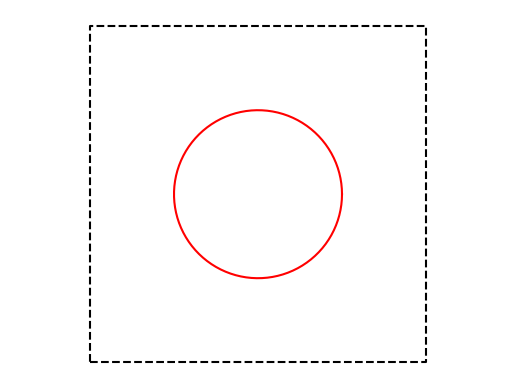

In [2]:
pb = ToyPb(name = "disk", bounds = (-1,1))
pb.show_border()

On construit ensuite un ensemble de points du plan pris au hasard qui sont "tagués" en fonction du problème précédent ($1$ si le point est dans le disque , $-1$ sinon). Ces données sont stockées dans un objet _data_ de la classe *nD_data*.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Le nombre de points tagués est *data.n*.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Les cordonnées de ces points sont accessibles sous la forme d'un tableau numpy _data.X_ de taille (*data.n*$)\times2$.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$)  Les tags sont stockés sous la forme d'un tableau numpy _data.Y_ de longueur *data.n*.

Les données de _data_ seront utilisées pour l'apprentissage. On peut construire aussi un ensemble de données de même type _test_ pour les tests (pour vérifier par exemple qu'on ne fait pas d'"overfitting".

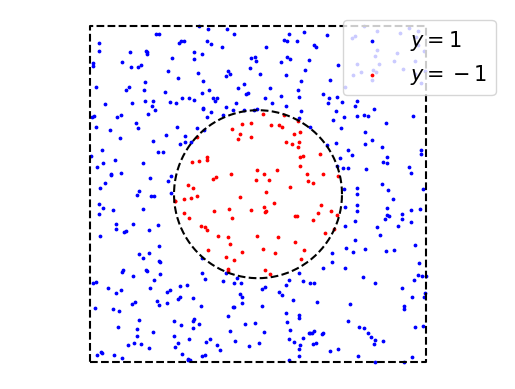

In [3]:
ndata = 1000
data = nD_data(n = ndata, pb = pb)

ntest = 500
test = nD_data(n = ntest, pb = pb, init_pred='yes')

test.show_class()
pb.show_border('k--')
plt.legend(loc=1, fontsize=15)
plt.show()

On construit enfin un objet du type _ToyNN_ qui définit un type de réseau de neurones, caractérisé les paramètres _CardNodes_ et la fonction d'activation _chi_. 

In [4]:
CardNodes = (2, 4, 6, 4, 1)
nn = ToyNN(card = CardNodes, chi="tanh", grid=(-1,1,41))

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>

# 2. Implémentation de la méthode de descente gradient
<a id='II'></a> 

Il s'agit de minimiser
$$
F(A)=\dfrac1{n_d}\sum_{i=0}^{n_d-1}\ell(h(x_i,A)\times y_i).
$$
où:<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) $A$ contient les coefficients (poids) d'un réseau de neurones de type *nn*,<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Les $x_i$ et $y_i$ sont les données stockées *data.X*[i] et *data.Y*[i],<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) $h(x,A)$ est la valeur que renvoie le réseau de neurones de poids $A$ avec l'entrée $x$,<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) $\ell$ est la fonction d'erreur *pb.loss*.   

Un pas de la méthode de gradient consiste en :
$$
A\ \longleftarrow\ A - \alpha\nabla F(A).
$$

__Initialisation__. On définit:<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Un ensemble de coefficients initial sous la forme d'une coef-list _A_ construite au hasard.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Un flottant _alpha_ correspondant au taux d'apprentissage ($\alpha=0.05$ ici).<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Un nombre d'itérations total _Niter_.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Un entier _niter_ initialisé  à 0 qui va représenté le nombre d'itérations effectuées.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Un entier _Ndata_ représentant la taille des données.<br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Un entier _niterplot_ qui indique la période des représentations graphiques au cours des itérations (une représentation graphique toutes les _niterplot_ itérations). <br>
&nbsp;&nbsp;&nbsp;&nbsp;
($*$) Une liste vide *Total_loss* pour stocker l'évolution de l'erreur totale au cours des itérations.

In [23]:
# Paramètres
alpha=0.05
Niter=500
Ndata=data.n
niterplot=50

# Initialisations
A=nn.create_rand()
niter=0
Erreur =[]

__Boucle d'optimisation__. On implémente ensuite la méthode du gradient de pas _alpha_.

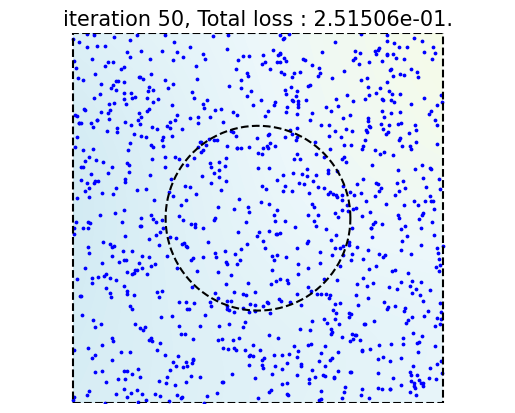

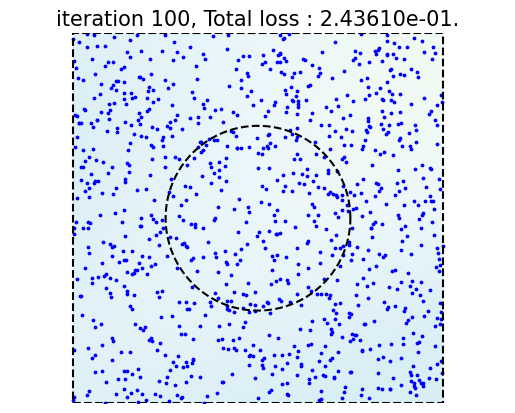

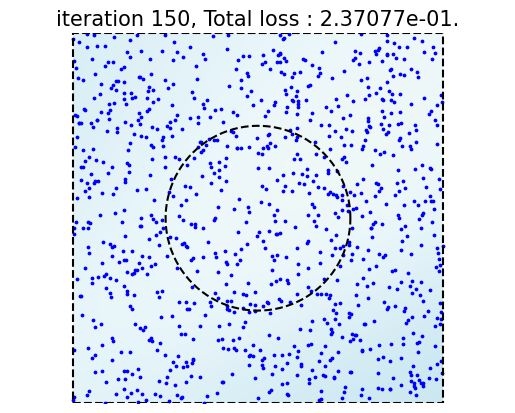

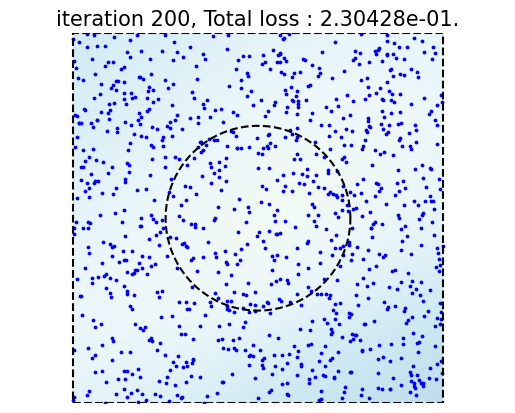

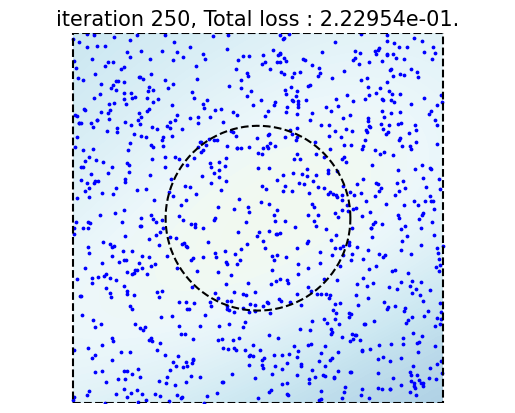

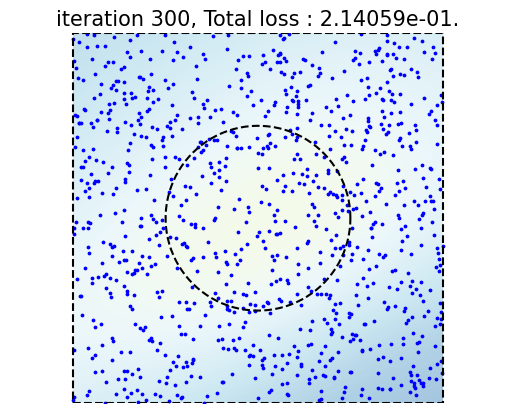

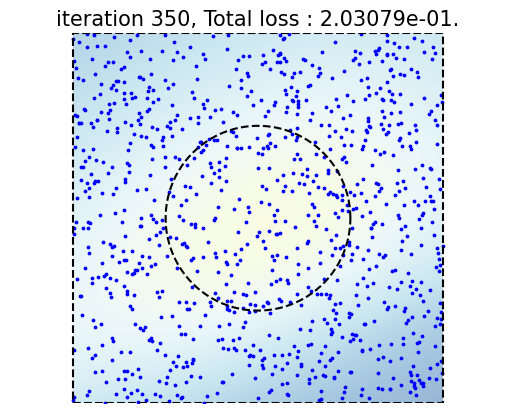

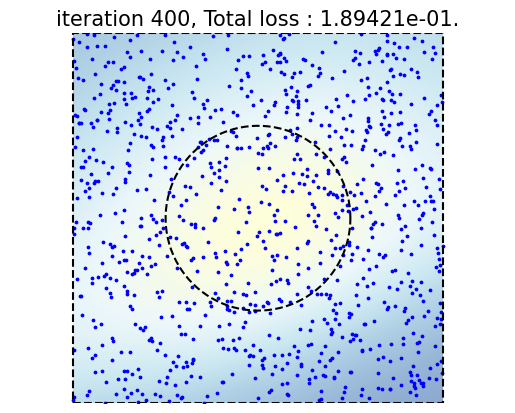

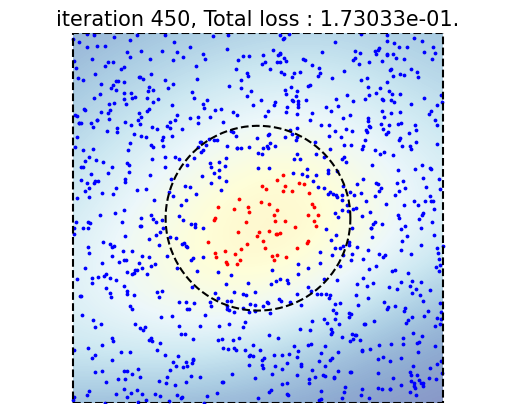

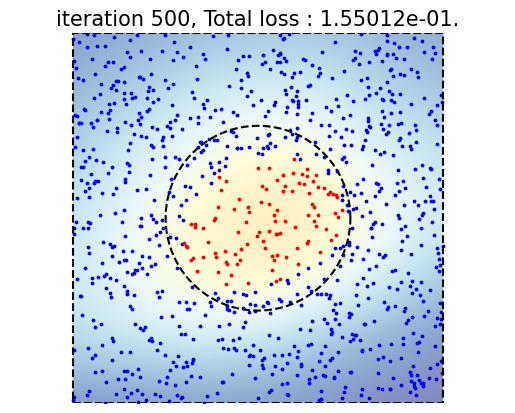

In [25]:
# Boucle d'optimisation pour la methode de gradient
for i_ in range(Niter):
    niter+=1
    # initialisation de dA
    dA=nn.create_zero()
    # calcul de -alpha*somme gradient des f_j
    for j in range(Ndata):
        x,y=data.X[j], data.Y[j]
        nn.descent(A, x, y, alpha=1/Ndata,B=dA, pb=pb)
    # mise à jour des coefficients de A
    nn.add(A,dA, c=alpha, output=False)
    
    # calcul de l'erreur et représentations graphiques
    if not niter%niterplot:
        error = nn.total_loss_and_prediction(A,data,pb=pb)
        Erreur.append(error)
        data.show_class(pred=True)
        nn.show_pred(A)
        pb.show_border('k--')
        plt.title(f"iteration {niter}, Total loss : {error:1.5e}.", fontsize=15)
        plt.show()
    else:
        error = nn.total_loss(A,data,pb=pb)
        Erreur.append(error)
        #print(f"iteration {niter}, Total loss : {error:1.5e}.")

Noter qu'il est possible de relancer la boucle d'optimisation (sans réinitialiser) en executant à nouveau le bloc précédent. On répète l'opération jusqu'à ce qu'à être satisfait de la performance du réseau de neurones.

Ensuite, on peut représenter l'évolution de l'erreur en fonctions des itérations (on représente aussi les coefficients de _A_).

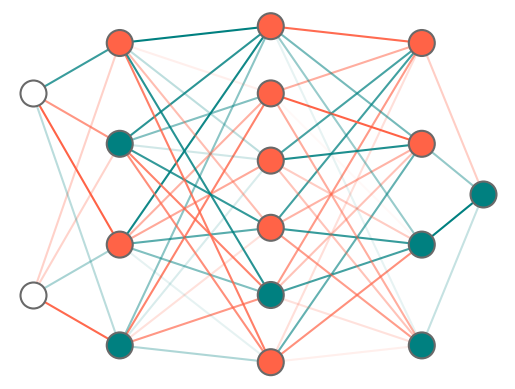

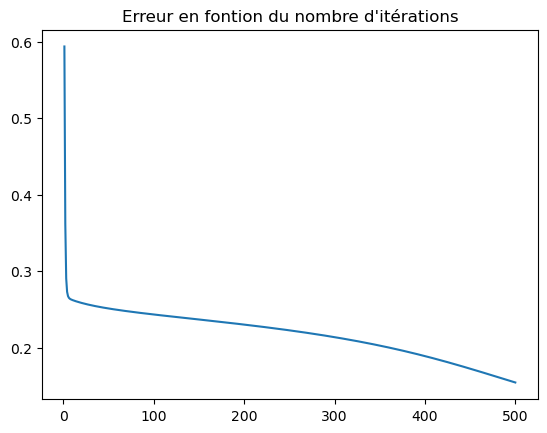

250 250


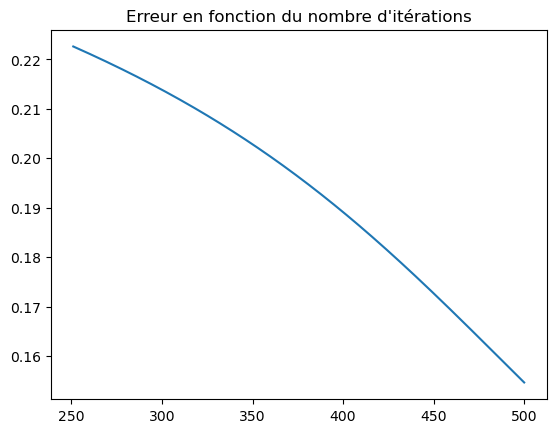

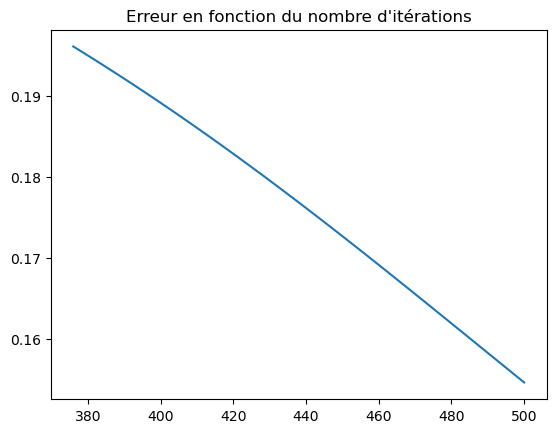

In [26]:
nn.show(A)

plt.plot(np.linspace(1,niter-1,niter-1),Erreur)
plt.title("Erreur en fontion du nombre d'itérations")
plt.show()

debut = niter//2
print(len(np.linspace(debut+1, niter-1,niter-debut-1)), len(Erreur[debut:]))
plt.plot(np.linspace(debut+1, niter-1,niter-debut-1),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'itérations")
plt.show()

debut = 3*(niter//4)
plt.plot(np.linspace(debut+1, niter-1,niter-debut-1),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'itérations")
plt.show()

# 3. Implémentation de la méthode du gradient stochastique <a id='III'></a> 

L'initialisation est la même que dans la partie précédente sauf que le compteur *nepoch* a remplacé le compteur *niter*. On compte le nombre d'époques au lieu du nombre d'itérations. 

Noter qu'on a pris un taux d'apprentissage $\alpha$ 10 fois plus petit que pour la méthode du gradient. 

In [12]:
# Paramètres
alpha=0.005
Nepoch=500
Ndata=data.n
niterplot=50

# Initialisations
A=nn.create_rand()
nepoch=0
Erreur =[]

La boucle d'optimisation est différente. Un entier _i_ est tiré au hasard dans $\{0,1,2,\dots,N-1\}$ à l'aide de *i=nprd.randint(N)*. On calcule le nouvel itéré en faisant un  pas de gradient pour la fonction
$$
F_i(A)=\ell(h(x^i,A)\times y^i)
$$
où $x^i=$*data.X*[i] et $y^i=$*data.Y*[i].<br>
Le nouvel itéré est obtenu par 
$$
A\ \longleftarrow\ A - \alpha \nabla F_i(A).
$$

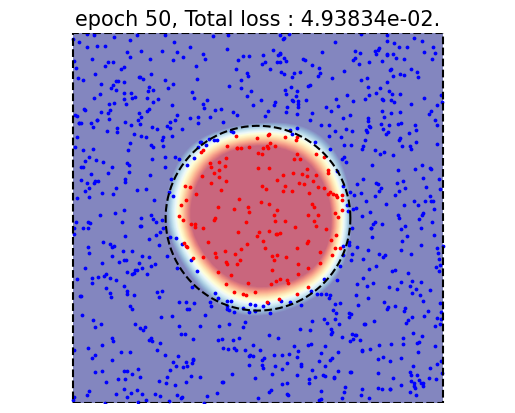

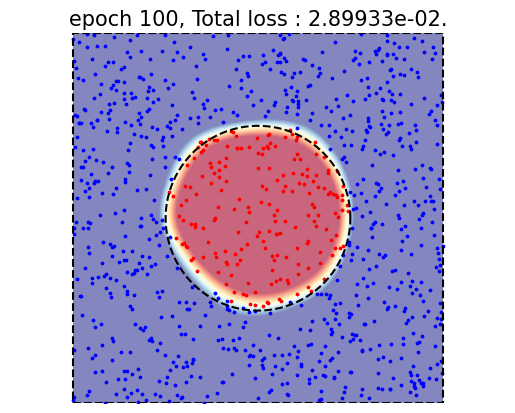

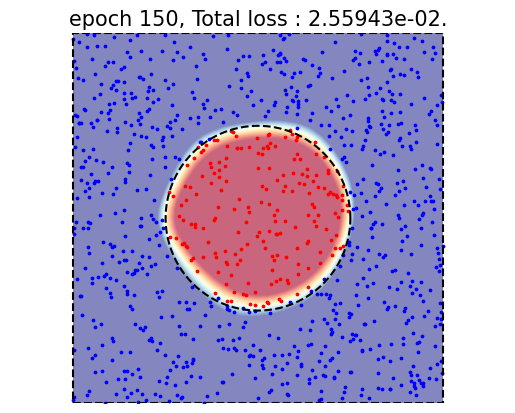

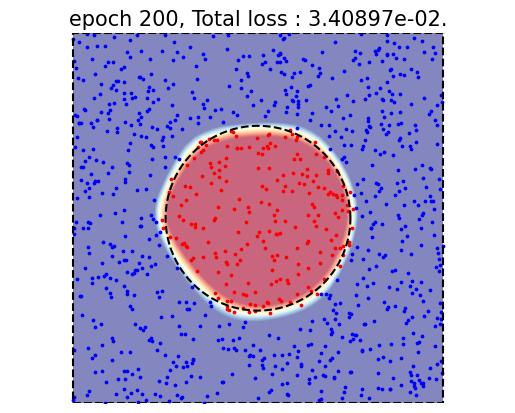

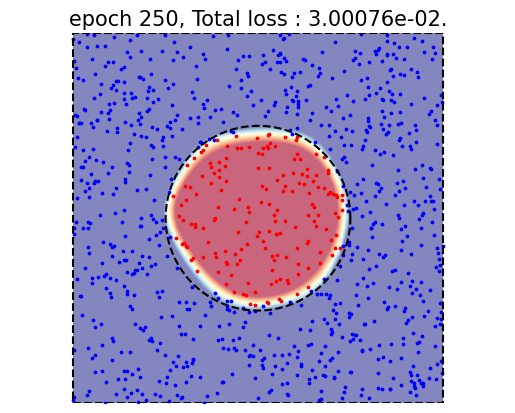

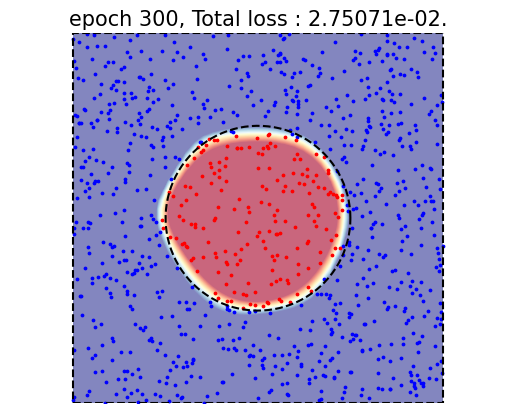

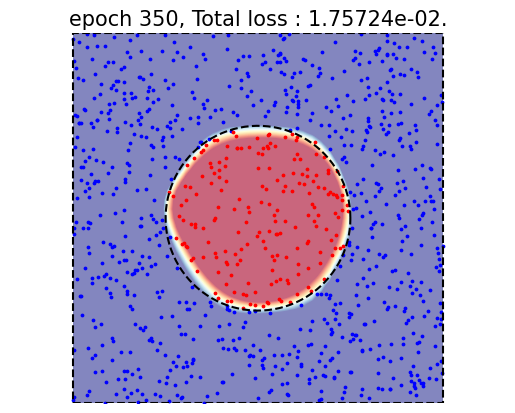

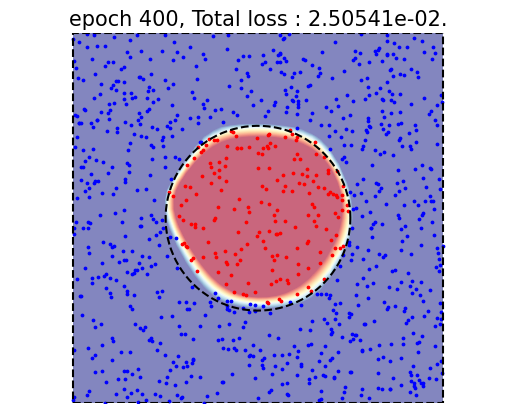

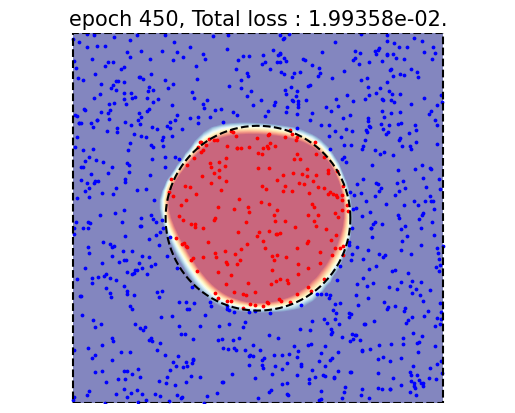

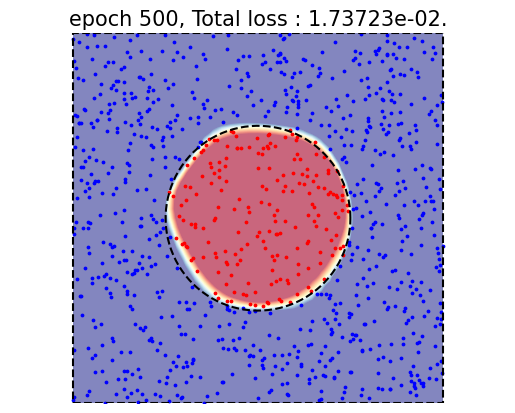

In [13]:
# Boucle d'optimisation pour la methode du gradient stochastique
for i_ in range(Nepoch):
    nepoch+=1
    for j_ in range(Ndata):
        i = nprd.randint(Ndata)
        x, y = data.X[i], data.Y[i]
        dA = nn.descent(A, x, y, alpha=alpha, pb=pb)
        nn.add(A, dA, output=False)
    
    # calcul de l'erreur et représentations graphiques
    if not nepoch%niterplot:
        error = nn.total_loss_and_prediction(A,data,pb=pb)
        Erreur.append(error)
        data.show_class(pred=True)
        nn.show_pred(A)
        pb.show_border('k--')
        plt.title(f"epoch {nepoch}, Total loss : {error:1.5e}.", fontsize=15)
        plt.show()
    else:
        error = nn.total_loss(A,data,pb=pb)
        Erreur.append(error)
        #print(f"epoch {nepoch}, Total loss : {error:1.5e}.")

On peut effectuer des représentations graphiques de l'erreur en fonctions des itérations.

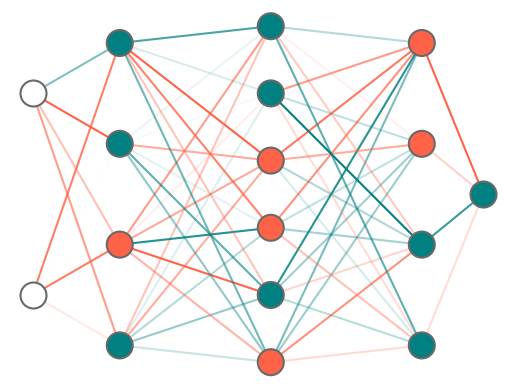

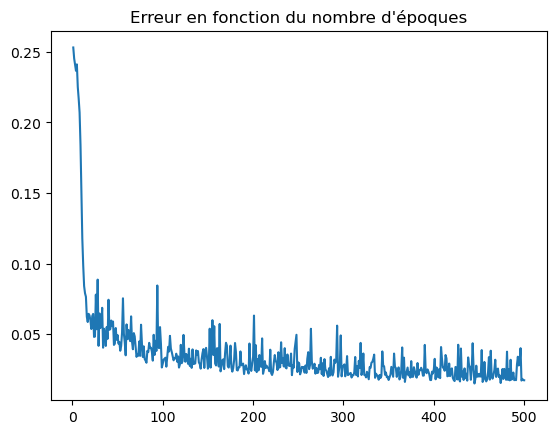

250 250


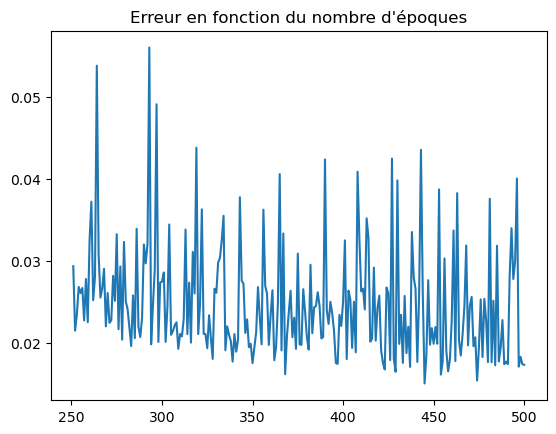

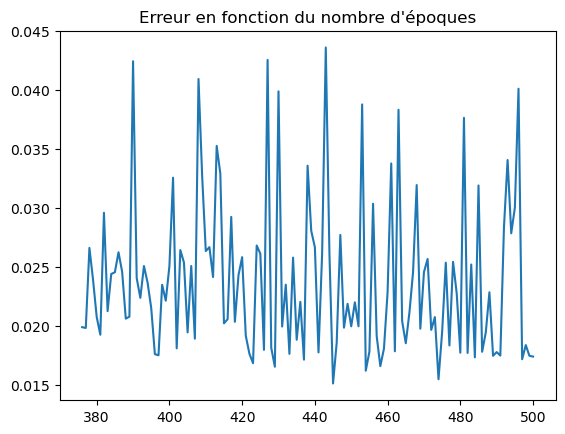

In [14]:
nn.show(A)

plt.plot(np.linspace(1,nepoch,nepoch),Erreur)
plt.title("Erreur en fonction du nombre d'époques")
plt.show()

debut = nepoch//2
print(len(np.linspace(debut+1, nepoch,nepoch-debut)), len(Erreur[debut:]))
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'époques")
plt.show()

debut = 3*(nepoch//4)
plt.plot(np.linspace(debut+1, nepoch,nepoch-debut),Erreur[debut:])
plt.title("Erreur en fonction du nombre d'époques")
plt.show()

<a href="#toc">top</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#I">1.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#II">2.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#III">3.</a>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<a href="#bot">bot.</a>
<a id='bot'></a>